# Exercises
`FCCT` `1990` Hill, Raymond. _A First Course in Coding Theory_. Clarendon Press: Oxford Applied Mathematics and Computing Science Series.
```{contents}
```

---

## Programming Environment

In [2]:
# %load imports.py
import numpy  as np
import pandas as pd

import matplotlib        as mpl
from   matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
plt.style.use('ggplot');
plt.rcParams.update({'text.usetex' : True});
%matplotlib inline

from   collections import defaultdict
from   itertools   import combinations,product
import itertools

from typing import Set

from IPython.display import display, Math

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'   :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''           :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'     :<{pad}}: {s.version}")
print(f"{''           :<{pad}}: {s.version_info}")
print(f"{''           :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib' :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'      :<{pad}}: {np .__version__}")

#==================================================

def rc (q : int,
        n : int) -> Set[str]:
  """Repetition Code
  Generate a q-ary repetition block code of length n.
  """
  S=set()
  for i in range(q):
    S.add(str(i)*n)
  return S

def fqn (q : int,
         n : int,
         g : int = 0) -> Set[str]:
  """Construct a linear space of dimension n over a finite field of order q.
  
  Parameters
  ==========
  g : If the space is very large, opt for the first g elements of a generator object.
  """
  if bool(g):
    f=itertools.product(range(q),repeat=n)
    return set(''.join(str(i) for i in next(f)) for _ in range(g))
  else:
    return {''.join(str(bit) for bit in word) for word in itertools.product(range(q),repeat=n)}

def qarycode_to_nbitstring (code={'3121','2101'},k=4):
  """Convert a q-ary code """
  for n in code:
    print(' '.join(format(int(i),f'0{k}b') for i in n))

def hd (a : str = '1001',
        b : str = '0101') -> int:
  """HAMMING DISTANCE
  
  Parameters
  ==========
  x : str
  y : str

  Return
  ======
  int
  """
  assert len(a) == len(b), 'x and y must have the same length'
  return sum(x!=y for x,y in zip(a,b))

def nbfmd (c  : Set[str],
           pr : bool = False) -> np.float16:
  """NAIVE BRUTE FORCE MINIMUM DISTANCE d(C)

  Computes the pairwise Hamming distance for all codewords and returns the minimum value.

  This is a naive (i.e., non vectorized) implementation using nested for loops.
  
  Parameters
  ==========
  c  : code
  pr : Print intermediate steps.

  Returns
  =======
  d(C)
  """

  # convert a set of string vectors to a 2D NumPy array of integers
  c=np.array([list(codeword) for codeword in c],dtype=np.float16)

  # intialize empty hamming distance matrix
  hamming = np.empty([c.shape[0]]*2,dtype=np.float16)
  for i,x in enumerate(c):
    for j,y in enumerate(c):
      hamming[i,j]=(x!=y).sum()
  # the diagonal represents the Hamming distance of a codeword with itself, which is always 0.
  np.fill_diagonal(hamming,np.inf)

  if pr == True:
    print(hamming)

  return hamming.min().astype(np.int8)

def one_error_detecting (q    : int,
                         code : Set[str],
                         p    : bool = False) -> bool:
  """Verify that a code is one-error detecting.
  No one-bit error equals a codeword.
  """
  flag=True
  alphabet=set(str(i) for i in range(q))
  for codeword in code:
    if p:
      print()
      print(f"{'orig cw : ':10}{codeword}")
    for i in range(len(codeword)):
      a,b,c=codeword[:i],codeword[i],codeword[i+1:]
      symbols=alphabet-set(codeword[i])
      for symbol in symbols:
        cw=codeword[:i]+symbol+codeword[i+1:] # SINGLE ERROR
        if cw in code:
          flag=False
          if p:
            print(f"{'ERROR':10}{cw}")
        else:
          if p:
            print(f"{'':10}{cw}")
  return flag

# set(''.join(l for l in i) for i in itertools.product('10',repeat=3))
# set(''.join(l for l in i) for i in itertools.combinations_with_replacement('012',r=3))
# set(''.join(l for l in i) for i in itertools.combinations('01',r=2))

EXECUTED            : 2023-05-11 11:53:34.006494

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1


---

## 1

### [1.1]

If the following message were received from outer space, why might it be conjectured that it was sent by a race of human-like beings who have one arm twice as long as the other?

[Hint: The number of digits in the message is the product of two prime numbers.]

In [1]:
message='00110000011000111111110110010011001001100101111000100100010010001001001100110'
message

'00110000011000111111110110010011001001100101111000100100010010001001001100110'

In [2]:
len(message)

77

In [28]:
c=np.array(list(message)).reshape(11,7)
c

array([['0', '0', '1', '1', '0', '0', '0'],
       ['0', '0', '1', '1', '0', '0', '0'],
       ['1', '1', '1', '1', '1', '1', '1'],
       ['1', '0', '1', '1', '0', '0', '1'],
       ['0', '0', '1', '1', '0', '0', '1'],
       ['0', '0', '1', '1', '0', '0', '1'],
       ['0', '1', '1', '1', '1', '0', '0'],
       ['0', '1', '0', '0', '1', '0', '0'],
       ['0', '1', '0', '0', '1', '0', '0'],
       ['0', '1', '0', '0', '1', '0', '0'],
       ['1', '1', '0', '0', '1', '1', '0']], dtype='<U1')

[['0011000']
 ['0011000']
 ['1111111']
 ['1011001']
 ['0011001']
 ['0011001']
 ['0111100']
 ['0100100']
 ['0100100']
 ['0100100']
 ['1100110']]


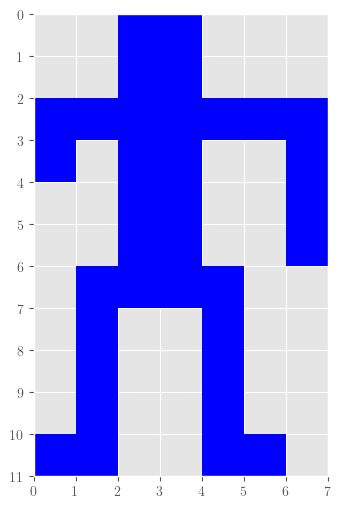

In [48]:
print(np.array([[''.join(row)] for row in np.array(list(message)).reshape(11,7)]))

fig = plt.figure(figsize=(6,6));
ax  = plt.subplot();

for i,row in enumerate(c):
  for j,col in enumerate(row):
    #print(i,j,col)
    if int(col):
      ax.add_patch(Rectangle((j,i),1,1,facecolor='blue'));

ax.set_aspect(1);
ax.set_xticks(ticks=np.arange(0,c.shape[1]+1));
ax.set_yticks(ticks=np.arange(0,c.shape[0]+1));
ax.set_xlim(0,c.shape[1]);
ax.set_ylim(c.shape[0],0);

"Pictures have actually been transmitted from Earth into outer space in this way.

Two large prime numbers were used so that a much more detailed picture could be sent.

It is reasonable to expect that a civilized recipient of such a message would be able to work out how to reconstruct the picture, since factorization of a number into prime factors is a property independent of language or notation."

### [1.2]

Suppose the binary repetition code of length $5$ is used for a binary symmetric channel which has symbol error probability $p$.

Show that the word error probability of the code is

$
10p^3-15p^4+6p^5
$

See the page on the binary repetition code of length $5$.

### [1.3]

Show that a code $C$ having minimum distance $d(C)=4$ can be used simultaneously to correct single errors and detect double errors.

[$C$ could also be used either as a single-error-correcting code or as a triple-error-detecting code, but not both simultaneously. Why not?]

$
\begin{aligned}
d(C)\ge4&=(s=3)+1
\\
d(C)\ge4&=2(t=1.5)+1
\end{aligned}
$

Suppose the vector $\mathbf{y}$ is received.

If $d(\mathbf{x,y})\le1$ for some codeword $\mathbf{x}\in C$, then $\mathbf{y}$ is closer to $\mathbf{x}$ than to any other codeword and so it will be decoded to it (and thus corrected).

If $d(\mathbf{x,y})\ge2$ for all codewords $\mathbf{x}\in C$, then $\mathbf{y}$ is equally distant from them all and so cannot be decoded to a closest codeword; and it is not a codeword; so, it can be detected.

<p style="color: red;">Why is this d(x,y)>=2, and not just d(x,y)=2?</p>

If $d(\mathbf{x,y})=3$ for some codeword $\mathbf{x}\in C$, then $\mathbf{y}$ is not a codeword by the minimum distance $d(C)=4$ of the code.

But it could be the case that $d(\mathbf{x',y})\le1$ for some other codeword $\mathbf{x'\ne x}\in C$.

In an error-correcting context, $\mathbf{y}$ would be decoded to $\mathbf{x'}$.

### [1.4]

The code used by Mariner 9 will correct any received $32$-tuple provided not more than how many errors have occurred?

See the page on the $(32,64,16)$ Reed-Muller code.

### [1.5]

(i) Show that a $3$-ary $(3,M,2)$-code must have $M\le9$.

Suppose $C$ is a $(3,M,2)$-code.

The $M$ ordered pairs obtained by deleting the third coordinate of each codeword must be distinct; for if any two were identical, then the corresponding codewords would differ only in the third position contradicting $d(C)=2$.

Therefore, $M\le q^2$.

(ii) Show that a $3$-ary $(3,9,2)$-code exists.

(iii) Generalize the results of (i) and (ii) to $q$-ary $(3,M,2)$-codes, for any integer $q\ge2$.

$
\{(a,b,(a+b)\mod q)\mid(a,b)\in(F_q)^2\}
$

is a $q$-ary $(3,q^2,2)$-code.

---

#### q=2,(3,4,2)-code

$
\begin{aligned}
(3,4,2)&\text{-code}\subseteq(F_2)^3
\end{aligned}
$

In [210]:
q=2
n=3
f=fqn(q,n)
M=fqn(q,2)
C=[list(m+str(sum([int(i) for i in m])%q) for m in sorted(list(M)))]
for k in range(q-1):
  C.append(list(''.join([str((int(i)+1)%q) for i in m]) for m in C[k]))

print(f"{q**n:,}")
print(f)
print(M)

pd.DataFrame(data=C)

8
{'001', '100', '110', '000', '101', '111', '010', '011'}
{'00', '11', '01', '10'}


,0,1,2,3
0,000,011,101,110
1,111,100,010,001


---

#### q=3,(3,9,2)-code

$
\begin{aligned}
(3,9,2)&\text{-code}\subseteq(F_3)^3
\end{aligned}
$

In [209]:
q=3
n=3
f=fqn(q,n)
M=fqn(q,2)
C=[list(m+str(sum([int(i) for i in m])%q) for m in sorted(list(M)))]
for k in range(q-1):
  C.append(list(''.join([str((int(i)+1)%q) for i in m]) for m in C[k]))

print(f"{q**n:,}")
print(f)
print(M)

pd.DataFrame(data=C)

27
{'110', '210', '212', '102', '010', '221', '021', '202', '002', '120', '111', '201', '100', '012', '020', '222', '121', '211', '022', '011', '001', '122', '220', '000', '112', '200', '101'}
{'00', '22', '20', '01', '10', '02', '11', '21', '12'}


,0,1,2,3,4,5,6,7,8
0,000,011,022,101,112,120,202,210,221
1,111,122,100,212,220,201,010,021,002
2,222,200,211,020,001,012,121,102,110


---

#### q=4,(3,16,2)-code

$
\begin{aligned}
(3,16,2)&\text{-code}\subseteq(F_4)^3
\end{aligned}
$

In [211]:
q=4
n=3
f=fqn(q,n)
M=fqn(q,2)
C=[list(m+str(sum([int(i) for i in m])%q) for m in sorted(list(M)))]
for k in range(q-1):
  C.append(list(''.join([str((int(i)+1)%q) for i in m]) for m in C[k]))

print(f"{q**n:,}")
print(f)
print(M)

pd.DataFrame(data=C)

64
{'300', '132', '013', '032', '110', '233', '103', '303', '210', '212', '102', '010', '221', '003', '030', '021', '313', '202', '322', '002', '120', '232', '311', '023', '111', '310', '201', '113', '301', '133', '331', '223', '100', '302', '321', '012', '020', '131', '222', '332', '121', '211', '022', '011', '312', '001', '031', '033', '122', '230', '320', '213', '220', '123', '000', '330', '112', '203', '323', '200', '333', '130', '101', '231'}
{'00', '22', '03', '20', '33', '01', '13', '10', '30', '02', '11', '31', '32', '21', '23', '12'}


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,000,011,022,033,101,112,123,130,202,213,220,231,303,310,321,332
1,111,122,133,100,212,223,230,201,313,320,331,302,010,021,032,003
2,222,233,200,211,323,330,301,312,020,031,002,013,121,132,103,110
3,333,300,311,322,030,001,012,023,131,102,113,120,232,203,210,221


---

#### q=5,(3,32,2)-code

$
\begin{aligned}
(3,32,2)&\text{-code}\subseteq(F_5)^3
\end{aligned}
$

In [212]:
q=5
n=3
f=fqn(q,n)
M=fqn(q,2)
C=[list(m+str(sum([int(i) for i in m])%q) for m in sorted(list(M)))]
for k in range(q-1):
  C.append(list(''.join([str((int(i)+1)%q) for i in m]) for m in C[k]))

print(f"{q**n:,}")
print(f)
print(M)

pd.DataFrame(data=C)

125
{'032', '124', '243', '340', '210', '433', '102', '003', '440', '322', '311', '443', '113', '414', '223', '321', '344', '004', '304', '412', '033', '034', '240', '320', '000', '333', '200', '401', '132', '434', '314', '104', '334', '430', '234', '204', '002', '111', '310', '301', '422', '331', '302', '012', '014', '131', '421', '022', '031', '230', '213', '330', '242', '420', '432', '101', '300', '233', '013', '103', '411', '214', '410', '442', '044', '010', '221', '224', '244', '141', '202', '343', '232', '120', '134', '201', '133', '100', '114', '222', '211', '024', '011', '312', '043', '112', '203', '400', '241', '130', '423', '404', '341', '110', '342', '303', '402', '212', '041', '030', '021', '313', '040', '023', '403', '042', '143', '020', '332', '121', '413', '441', '431', '142', '424', '001', '122', '220', '123', '144', '140', '323', '324', '231', '444'}
{'13', '10', '24', '02', '11', '31', '44', '23', '00', '03', '30', '12', '41', '20', '21', '34', '14', '22', '33', '01',

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,000,011,022,033,044,101,112,123,134,140,...,303,314,320,331,342,404,410,421,432,443
1,111,122,133,144,100,212,223,234,240,201,...,414,420,431,442,403,010,021,032,043,004
2,222,233,244,200,211,323,334,340,301,312,...,020,031,042,003,014,121,132,143,104,110
3,333,344,300,311,322,434,440,401,412,423,...,131,142,103,114,120,232,243,204,210,221
4,444,400,411,422,433,040,001,012,023,034,...,242,203,214,220,231,343,304,310,321,332


---